In [2]:
import pandas as pd

In [11]:
review = pd.read_excel('C:/Users/Sum/Desktop/Sumin/16.프로젝트/한경_농협양곡/00.데이터/blog_동네정미소_content.xlsx')
review.head()

,Unnamed: 0,0
0,0,희미해져 가는 추억 속 그 이름 ‘정미소’가 우리네 일상속에 새롭게 스며들고 있다....
1,1,#동네정미소 #쌀집 #밥집 #농식품펀드 #협동조합\n쌀이 먼저다! 라이프스타일 라...
2,2,정갈하게 맛있는 수원 광교 앨리웨이 맛집 '동네정미소'\n지난 1월에 다녀온\n광교...
3,3,"#광교호수공원카페 치고는 꽤나 이색적인, 그렇지만 그게 또 이 곳만의 멋이라고 생각..."
4,4,"안녕하세요 여러분!\n취업왕이에요.여러분은\n'애플, 스타벅스, 아마존, 디즈니, ..."


In [12]:
del review['Unnamed: 0']
review.columns=['contents']
review.head()

,contents
0,희미해져 가는 추억 속 그 이름 ‘정미소’가 우리네 일상속에 새롭게 스며들고 있다....
1,#동네정미소 #쌀집 #밥집 #농식품펀드 #협동조합\n쌀이 먼저다! 라이프스타일 라...
2,정갈하게 맛있는 수원 광교 앨리웨이 맛집 '동네정미소'\n지난 1월에 다녀온\n광교...
3,"#광교호수공원카페 치고는 꽤나 이색적인, 그렇지만 그게 또 이 곳만의 멋이라고 생각..."
4,"안녕하세요 여러분!\n취업왕이에요.여러분은\n'애플, 스타벅스, 아마존, 디즈니, ..."


In [17]:
review['contents']=review['contents'].str.replace("[^ㄱ-ㅣ가-힣]", " ")
review[:5]

<ipython-input-17-577add953eb2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  review['contents']=review['contents'].str.replace("[^ㄱ-ㅣ가-힣]", " ")


,contents
0,희미해져 가는 추억 속 그 이름 정미소 가 우리네 일상속에 새롭게 스며들고 있다 ...
1,동네정미소 쌀집 밥집 농식품펀드 협동조합 쌀이 먼저다 라이프스타일 라이...
2,정갈하게 맛있는 수원 광교 앨리웨이 맛집 동네정미소 지난 월에 다녀온 광교 앨...
3,광교호수공원카페 치고는 꽤나 이색적인 그렇지만 그게 또 이 곳만의 멋이라고 생각...
4,안녕하세요 여러분 취업왕이에요 여러분은 애플 스타벅스 아마존 디즈니 넷플...


In [26]:
#결측치 확인
review.contents.isnull().sum()

0

In [25]:
review.dropna(inplace=True)

In [28]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 342
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   contents  190 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [27]:
#중복값 확인
review.contents.nunique()

190

In [29]:
# Open Korean Text
from konlpy.tag import Okt
okt = Okt()

In [30]:
tokens=[]
for x in review.contents : 
    tokens = okt.nouns(x)
tokens[:10]

['집값', '상승', '주거', '환경', '등', '도시', '주거', '문제', '사회', '이슈']

In [31]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    text = re.sub('[A-Za-z0-9]', '', token)
    if text:
        new_tokens.append(text)

In [33]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)


import nltk

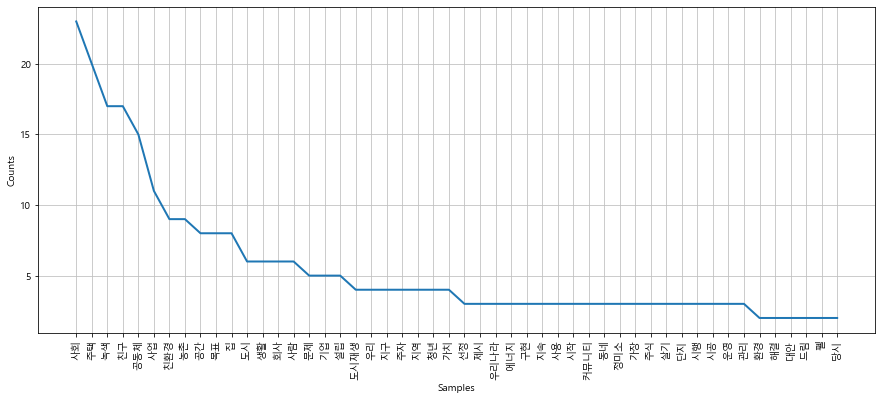

In [38]:
riceshop = nltk.Text(new_tokens, name='동네정미소')
plt.figure(figsize=(15,6))
riceshop.plot(50)
plt.show()

In [42]:
stop_words=['때문','위해','수','주거','것','년','거','입','그','저희','무엇','때','게','등','안','데','난의','펠','주택']
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['집값', '상승', '환경', '도시', '문제', '사회', '이슈', '지도', '근본', '문제']

In [43]:
import numpy as np 
from PIL import Image
from wordcloud import WordCloud

In [49]:
data = riceshop.vocab().most_common(300)

wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white',
    colormap='PuBu'
).generate_from_frequencies(dict(data))

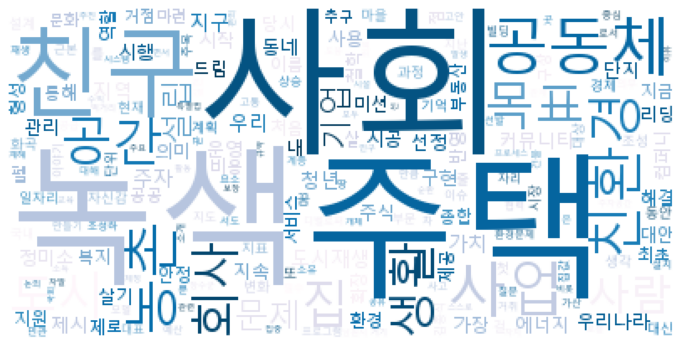

In [50]:
plt.figure(figsize=(12,10))
plt.imshow(wc)
plt.axis("off")
plt.show()